In [1]:
# This Project was started to accomplish exploratory data analysis for a data set of video game sales. The goal is to explore the data, clean and prep as
# necessary, then find interesting insights and plot them.

In [2]:
#Import tools. Load and preview data.

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

df = pd.read_csv('data/video_games_sales.csv') # Reads DataFrame
df['Year'] = df['Year'].astype('Int64')   # Removes decimal from year column
df.head(20) # First 20 records

# Data is organized by Global_Sales Descending by default
# Sales are in Millions
# The top 15 games in Global Sales are all published by Nintendo

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [3]:
# Provides descriptive statistics for DataFrame
df.describe()

# Count reveals nulls or missing values

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.0,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.0,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.0,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.0,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.0,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.0,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
# Provides non-null count and data types
df.info()

# Again, reveals nulls or missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  Int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
# Count nulls per column
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
# Shows records with null values

# pd.set_option("display.max_rows", None)
# Line above allows to view all null records

df[df.isnull().any(axis=1)]

# Decided not to remove null values. Not all games have a Publisher, and Year column did not effect graphs.

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,<NA>,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,<NA>,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,<NA>,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,<NA>,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,<NA>,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,<NA>,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011,Racing,NaN,0.00,0.01,0.00,0.00,0.01


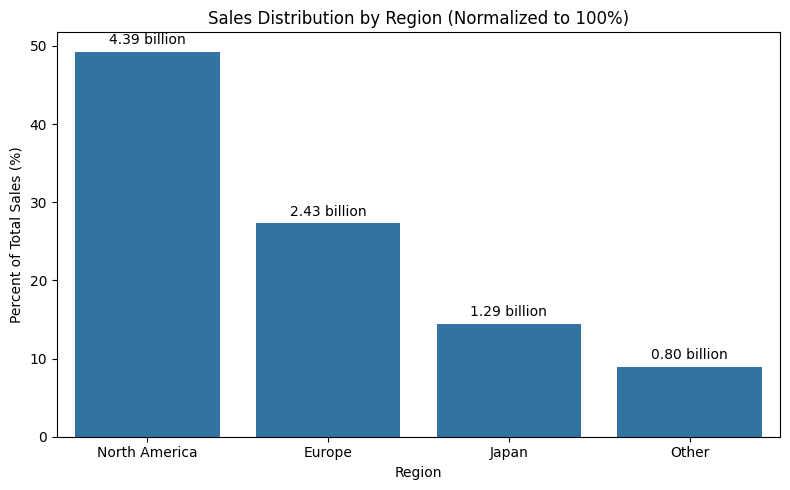

In [7]:
# Sales distribution by region

sales_cols = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]

# Calculate totals (millions)
totals = df[sales_cols].sum()
percentages = (totals / totals.sum()) * 100

# Build plotting DataFrame
plot_df = percentages.reset_index()
plot_df.columns = ["Region", "Percent"]
plot_df["Total_Sales"] = totals.values

# Convert millions into billions
plot_df["Total_Billions"] = plot_df["Total_Sales"] / 1000

# Plot
plt.figure(figsize=(8,5))
ax = sns.barplot(data=plot_df, x="Region", y="Percent")

# Add billions label
ax.set_xticks(range(len(plot_df)))
ax.set_xticklabels(["North America", "Europe", "Japan", "Other"])
for i, row in plot_df.iterrows():
    ax.text(
        i,
        row["Percent"] + 1,
        f'{row["Total_Billions"]:.2f} billion',
        ha='center',
        fontsize=10
    )
# Labels
plt.ylabel("Percent of Total Sales (%)")
plt.title("Sales Distribution by Region (Normalized to 100%)")
plt.tight_layout()
ax.set_xticklabels(["North America", "Europe", "Japan", "Other"])
plt.show()

# NA makes up nearly half of all video game sales

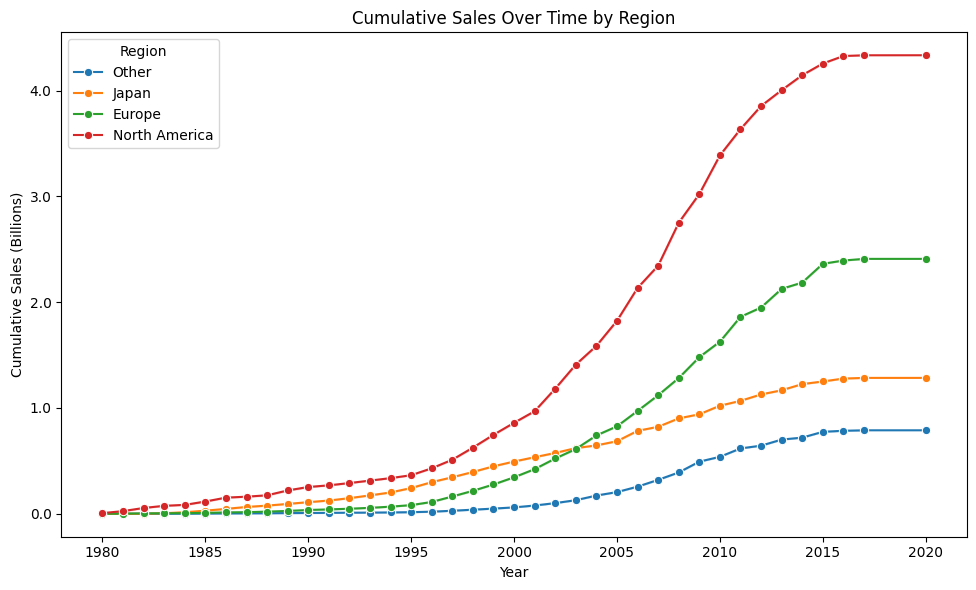

In [8]:
# Sales over time by Region

df_long = df.melt(
    id_vars="Year",
    value_vars=sales_cols,
    var_name="Region",
    value_name="Sales"
)
df_long = df_long.sort_values("Year")  # sort first

df_long["Cumulative_Sales"] = df_long.groupby("Region")["Sales"].cumsum()
df_long["Region"] = df_long["Region"].replace({
    "NA_Sales": "North America",
    "EU_Sales": "Europe",
    "JP_Sales": "Japan",
    "Other_Sales": "Other"
})

# Plot
plt.figure(figsize=(10,6))

ax = sns.lineplot(
    data=df_long,
    x="Year",
    y="Cumulative_Sales",
    hue="Region",
    marker="o"
)

# Labels
plt.title("Cumulative Sales Over Time by Region")
plt.ylabel("Cumulative Sales")
plt.xlabel("Year")
plt.tight_layout()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: x / 1000))
plt.ylabel("Cumulative Sales (Billions)")
plt.show()

#Video Game sales had exponential growth in NA

In [9]:
counts = df['Year'].value_counts().sort_index()
print(counts)

Year
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     349
2001     482
2002     829
2003     775
2004     763
2005     941
2006    1008
2007    1202
2008    1428
2009    1431
2010    1259
2011    1139
2012     657
2013     546
2014     582
2015     614
2016     344
2017       3
2020       1
Name: count, dtype: Int64


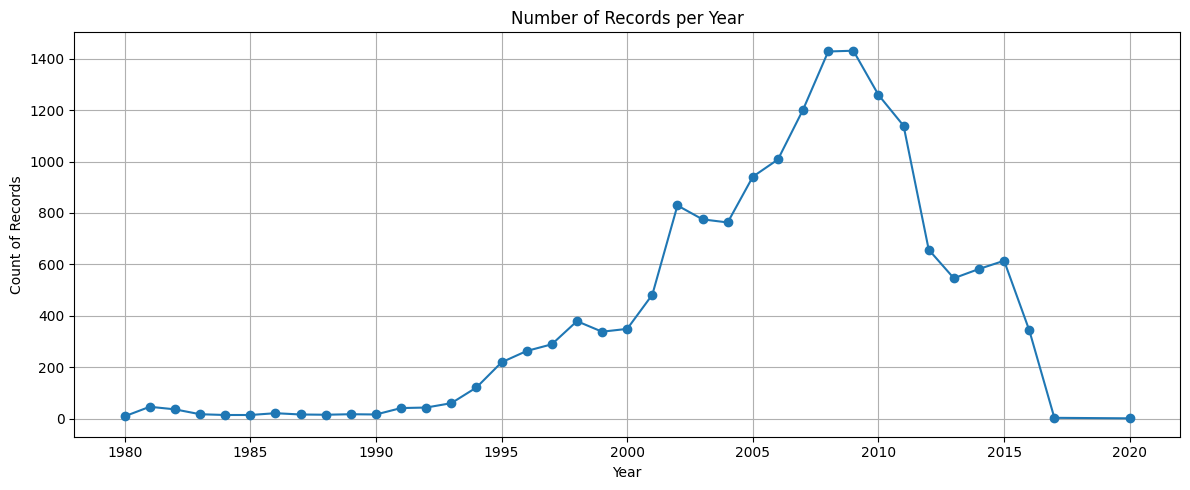

In [10]:
plt.figure(figsize=(12,5))
counts.plot(kind='line', marker='o')

plt.xlabel("Year")
plt.ylabel("Count of Records")
plt.title("Number of Records per Year")
plt.grid(True)
plt.tight_layout()
plt.show()


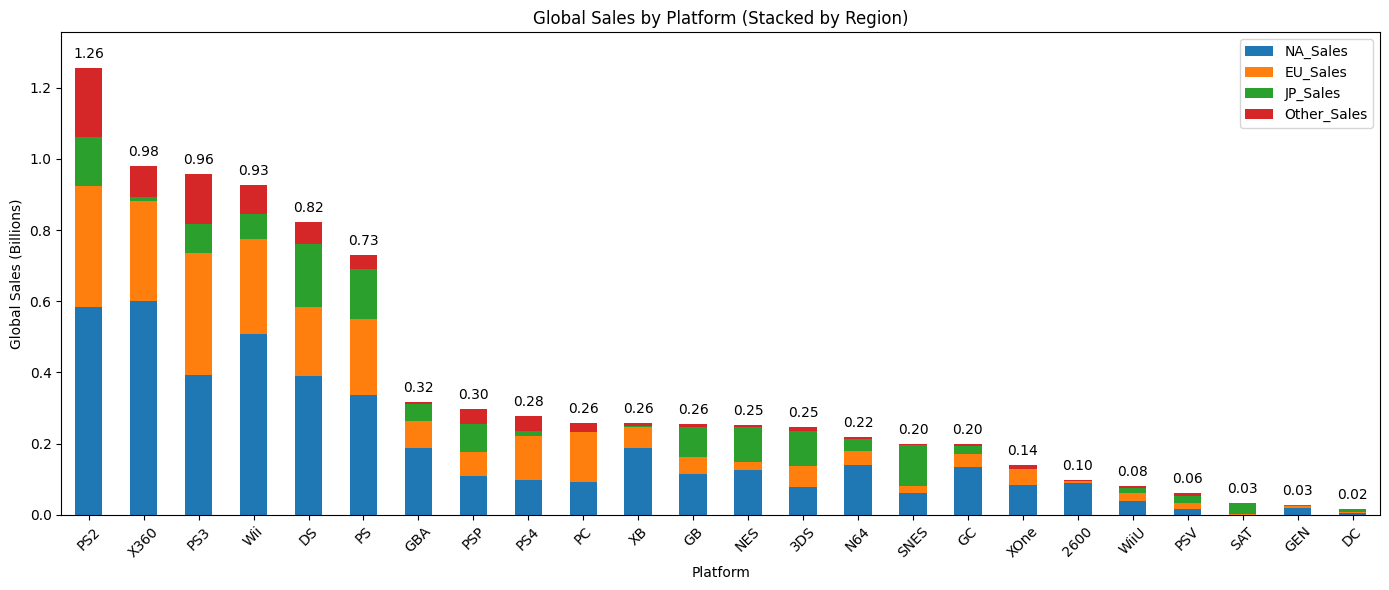

In [11]:
#Global Sales by Platform (Stack by Region)

# Aggregate totals per platform
pivot = df.groupby("Platform")[sales_cols].sum()

# Convert from millions to billions
pivot = pivot / 1000
df['Year'].value_counts().sort_index()
platform_order = (df.groupby("Platform")["Global_Sales"].sum()
                  .sort_values(ascending=False).index)
pivot = pivot.reindex(platform_order)

# Remove rows where total global sales appear as 0.0
pivot = pivot[pivot.sum(axis=1) > 0.01]

# Plot stacked bars
ax = pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(14,6),
    edgecolor="none"
)

# Add Global_Sales labels on top of each bar
totals = pivot.sum(axis=1)  # sum of all regions per platform
for i, total in enumerate(totals):
    ax.text(
        i,
        total + 0.02,
        f'{total:.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Other Labels and title
ax.set_ylabel("Global Sales (Billions)")
ax.set_xlabel("Platform")
ax.set_title("Global Sales by Platform (Stacked by Region)")
ax.set_ylim(0, totals.max() + 0.1)   # adjust to fit labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Xbox consoles (X360, XB, XOne) do not sell well in Japan
# PC Sales are also almost non-existent in Japan